In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def get_data_stats(root_path):
    image_folder = root_path
    data = []
    box_data = []
    
    class_map = {0: 'door', 1: 'wall', 2: 'window'}
    
    files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
    
    for file in files:
        img_path = os.path.join(image_folder, file)
        txt_path = os.path.join(image_folder, file.replace('.png', '.txt'))
        
        with Image.open(img_path) as img:
            width, height = img.size
            
        if os.path.exists(txt_path):
            with open(txt_path, 'r') as f:
                lines = f.readlines()
                num_objs = len(lines)
                for line in lines:
                    parts = line.split()
                    cls = int(parts[0])
                    w_rel = float(parts[3])
                    h_rel = float(parts[4])
                    box_data.append({
                        'class': class_map.get(cls, 'unknown'),
                        'w_px': w_rel * width,
                        'h_px': h_rel * height,
                        'area_rel': w_rel * h_rel
                    })
        else:
            num_objs = 0
            
        data.append({
            'file': file,
            'width': width,
            'height': height,
            'num_objects': num_objs
        })
        
    df_imgs = pd.DataFrame(data)
    df_boxes = pd.DataFrame(box_data)
    return df_imgs, df_boxes

In [3]:
def plot_eda(df_imgs, df_boxes, title):
    print(f"\n{'='*20}\nANALYSIS: {title.upper()}\n{'='*20}")
    
    print("\n[1] Image Dimensions (Pixels):")
    print(df_imgs[['width', 'height']].describe(percentiles=[.25, .5, .75, .9]))
    
    print("\n[2] Object Count per Image:")
    print(df_imgs['num_objects'].describe())
    
    print("\n[3] Class Totals:")
    print(df_boxes['class'].value_counts())

    plt.figure(figsize=(10, 6))
    df_boxes['class'].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{title} - Class Distribution')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    df_imgs['num_objects'].hist(bins=30, color='salmon', edgecolor='black')
    plt.title(f'{title} - Objects per Image Distribution')
    plt.xlabel('Number of Objects')
    plt.ylabel('Number of Images')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(df_imgs['width'], df_imgs['height'], alpha=0.4, color='green')
    plt.title(f'{title} - Image Resolutions')
    plt.xlabel('Width (px)')
    plt.ylabel('Height (px)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


ANALYSIS: COLORFUL

[1] Image Dimensions (Pixels):
             width       height
count   276.000000   276.000000
mean   1509.094203  1376.463768
std     775.660229   456.722548
min     466.000000   535.000000
25%     983.250000  1041.750000
50%    1381.000000  1272.000000
75%    1797.000000  1601.250000
90%    2493.500000  2030.000000
max    5333.000000  2936.000000

[2] Object Count per Image:
count    276.000000
mean      41.449275
std       26.548774
min       11.000000
25%       25.000000
50%       34.000000
75%       52.000000
max      199.000000
Name: num_objects, dtype: float64

[3] Class Totals:
class
wall      6695
door      2542
window    2203
Name: count, dtype: int64


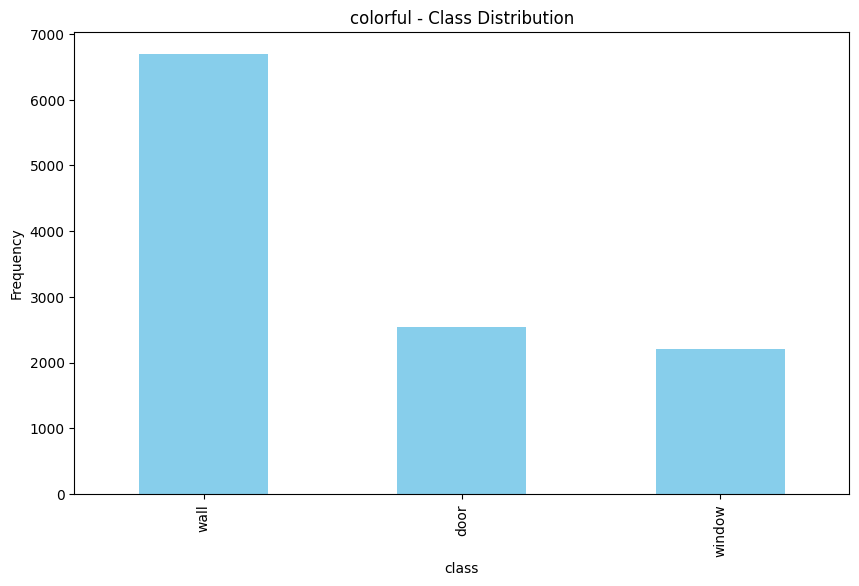

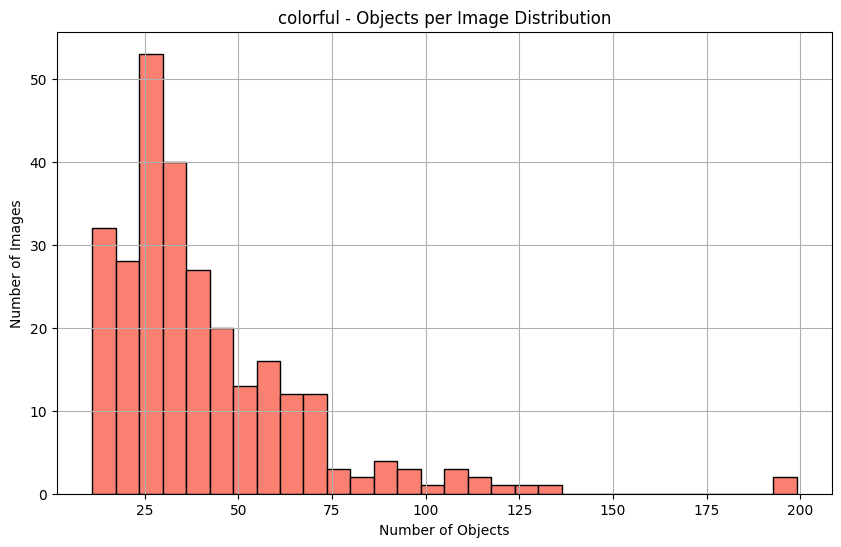

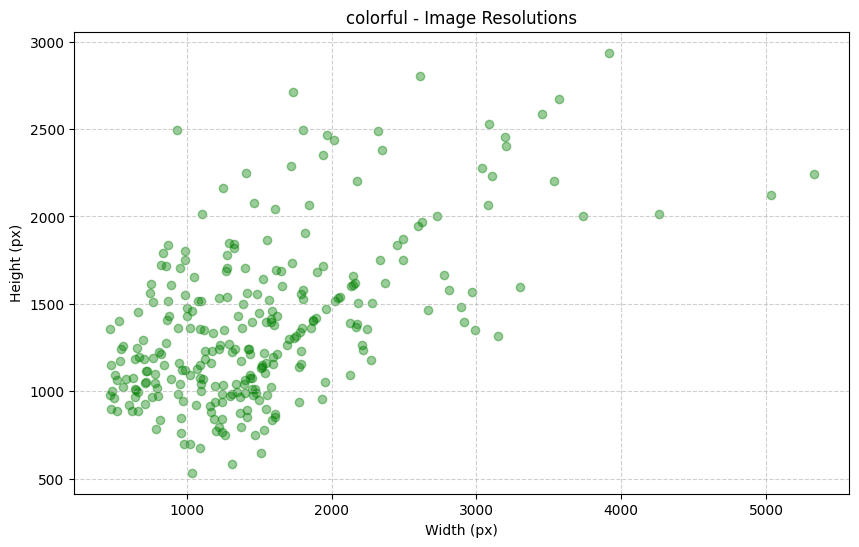

C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (90344064 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



ANALYSIS: BLACK_AND_WHITE

[1] Image Dimensions (Pixels):
              width       height
count   4724.000000  4724.000000
mean    1601.946232  1399.910034
std      831.616460   525.800131
min      414.000000   430.000000
25%     1050.000000  1023.000000
50%     1412.000000  1312.000000
75%     1931.000000  1629.000000
90%     2674.100000  2065.000000
max    14304.000000  6316.000000

[2] Object Count per Image:
count    4724.000000
mean       45.308425
std        26.115955
min         1.000000
25%        28.000000
50%        37.000000
75%        56.000000
max       400.000000
Name: num_objects, dtype: float64

[3] Class Totals:
class
wall      124828
door       47403
window     41806
Name: count, dtype: int64


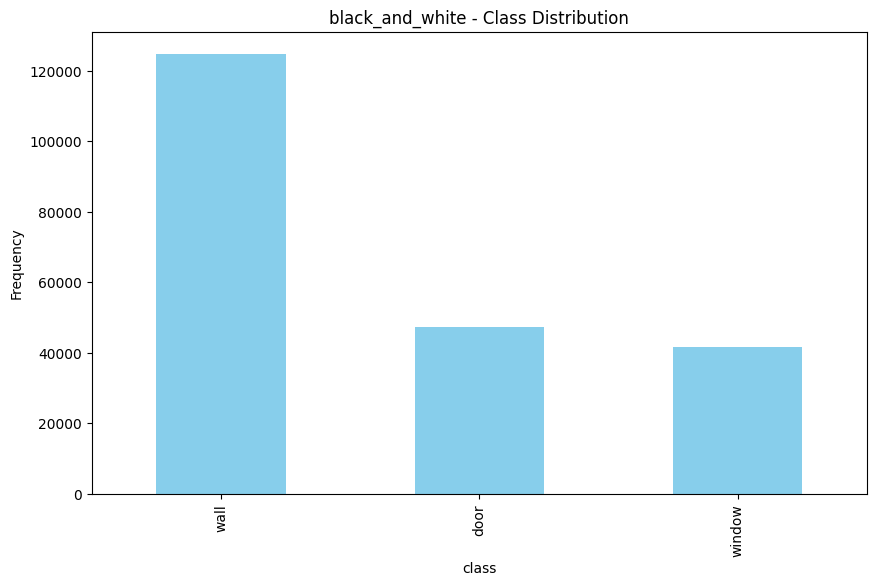

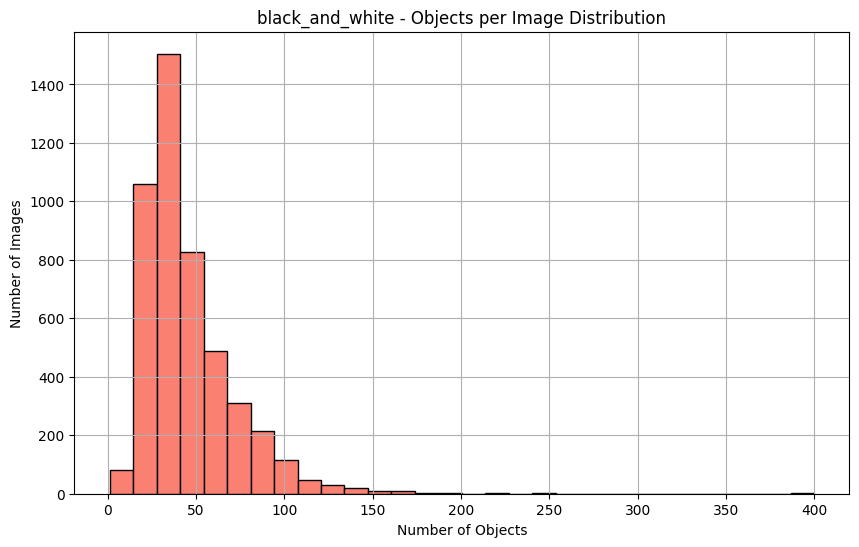

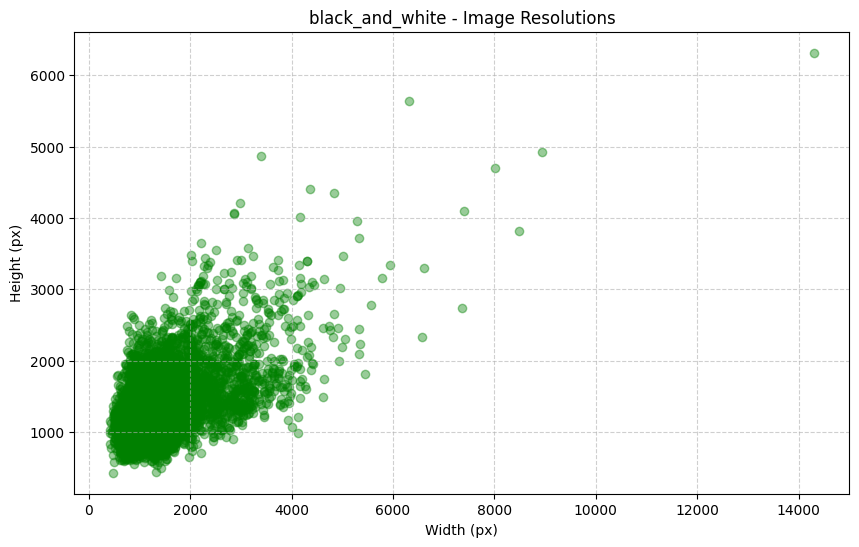

In [4]:
base_path = "data"
folders = ['colorful', 'black_and_white']

for folder in folders:
    path = os.path.join(base_path, folder)
    if os.path.exists(path):
        df_imgs, df_boxes = get_data_stats(path)
        plot_eda(df_imgs, df_boxes, folder)